In [ ]:
!pip install git+https://github.com/THU-MIG/yoloe.git#subdirectory=third_party/CLIP
!pip install git+https://github.com/THU-MIG/yoloe.git#subdirectory=third_party/ml-mobileclip
!pip install git+https://github.com/THU-MIG/yoloe.git#subdirectory=third_party/lvis-api
!pip install git+https://github.com/THU-MIG/yoloe.git

!wget https://docs-assets.developer.apple.com/ml-research/datasets/mobileclip/mobileclip_blt.pt

  Cloning https://github.com/THU-MIG/yoloe.git to /tmp/pip-req-build-gqze4jqx
  Running command git clone --filter=blob:none --quiet https://github.com/THU-MIG/yoloe.git /tmp/pip-req-build-gqze4jqx
  Resolved https://github.com/THU-MIG/yoloe.git to commit 1263e51b66cf65edf9c760de72e73939e1b49a7e
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from huggingface_hub import hf_hub_download

path = hf_hub_download(repo_id="jameslahm/yoloe", filename="yoloe-v8l-seg.pt", local_dir='.')
path = hf_hub_download(repo_id="jameslahm/yoloe", filename="yoloe-v8l-seg-pf.pt", local_dir='.')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


yoloe-v8l-seg.pt:   0%|          | 0.00/107M [00:00<?, ?B/s]

yoloe-v8l-seg-pf.pt:   0%|          | 0.00/103M [00:00<?, ?B/s]

In [ ]:
!wget https://raw.githubusercontent.com/THU-MIG/yoloe/main/ultralytics/assets/bus.jpg
!wget https://raw.githubusercontent.com/THU-MIG/yoloe/main/ultralytics/assets/zidane.jpg
!wget https://raw.githubusercontent.com/THU-MIG/yoloe/main/ultralytics/assets/bus_mask.png
!wget https://raw.githubusercontent.com/THU-MIG/yoloe/main/tools/ram_tag_list.txt

--2025-03-12 12:47:01--  https://raw.githubusercontent.com/THU-MIG/yoloe/main/ultralytics/assets/bus.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137419 (134K) [image/jpeg]
Saving to: ‘bus.jpg’

bus.jpg             100%[===================>] 134.20K  --.-KB/s    in 0.02s   

2025-03-12 12:47:01 (7.04 MB/s) - ‘bus.jpg’ saved [137419/137419]

--2025-03-12 12:47:01--  https://raw.githubusercontent.com/THU-MIG/yoloe/main/ultralytics/assets/zidane.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50427 (49K) [image/jpeg]
Savin

Build text model mobileclip:blt

image 1/1 /content/bus.jpg: 640x640 4 persons, 1 bus, 69.7ms
Speed: 9.6ms preprocess, 69.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)


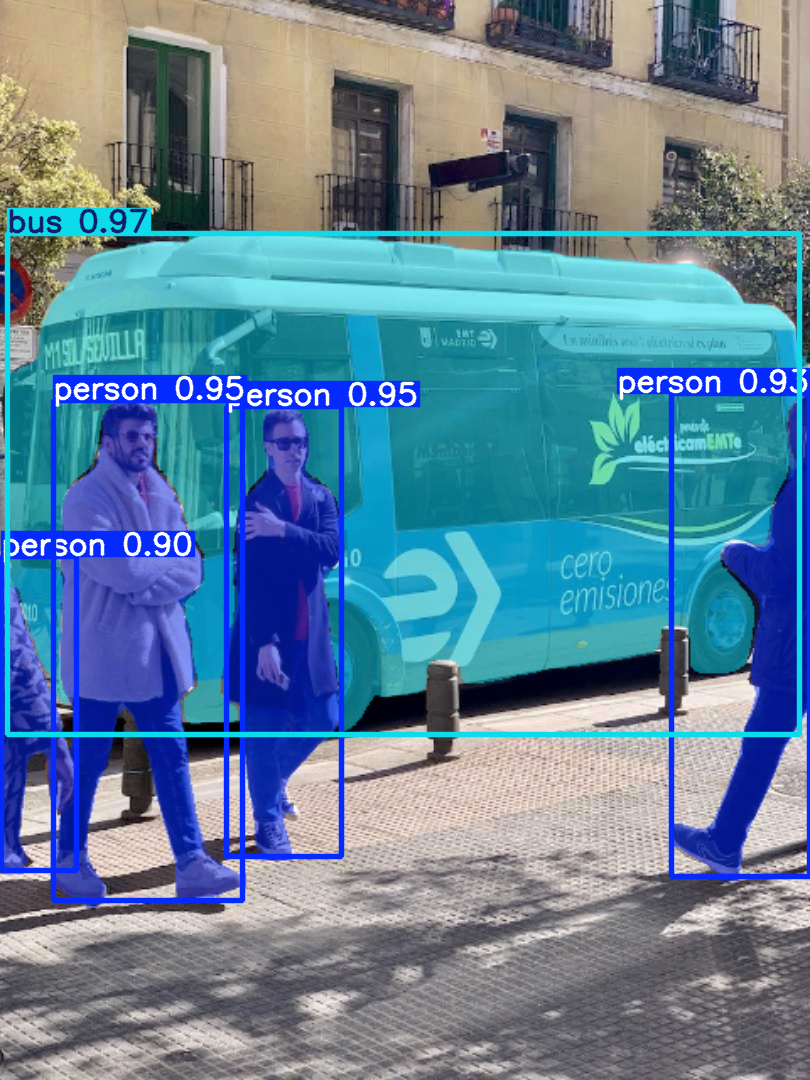

In [ ]:
# Text Prompt
from ultralytics import YOLOE

model = YOLOE("yoloe-v8l-seg.pt").cuda()
names = ["person", "bus"]
model.set_classes(names, model.get_text_pe(names))

results = model.predict('bus.jpg')
results[0].show()

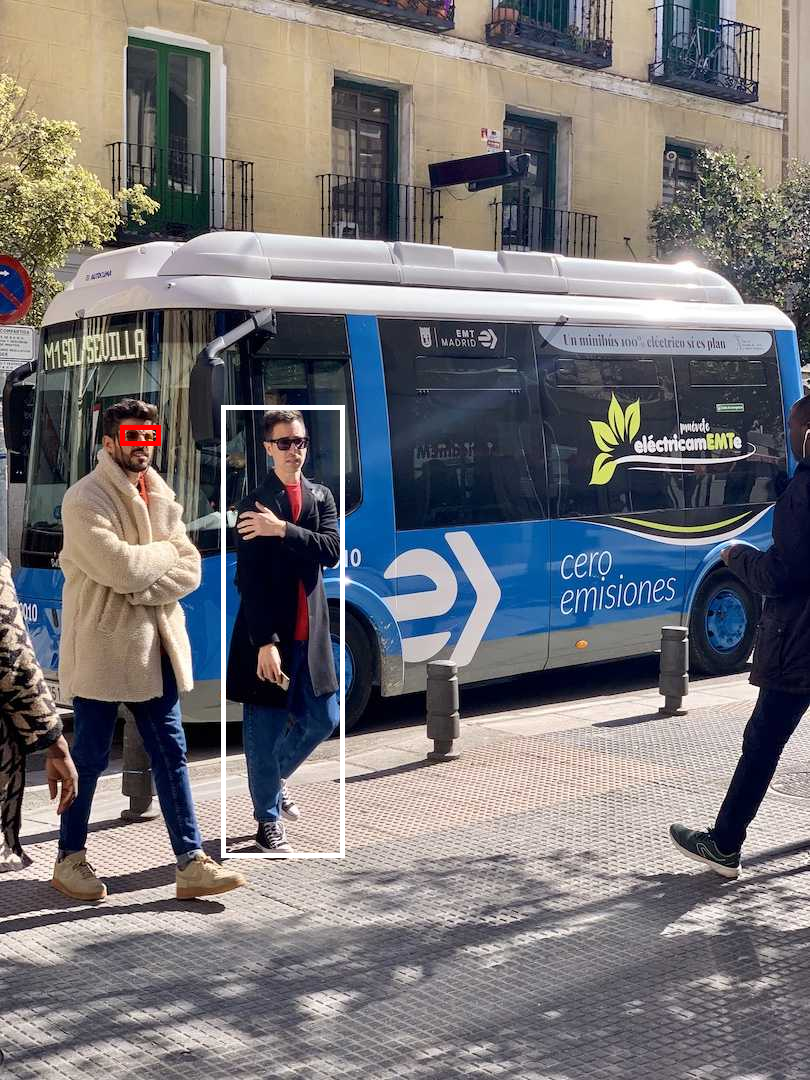


image 1/1 /content/bus.jpg: 640x640 4 object0s, 2 object1s, 97.0ms
Speed: 9.1ms preprocess, 97.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


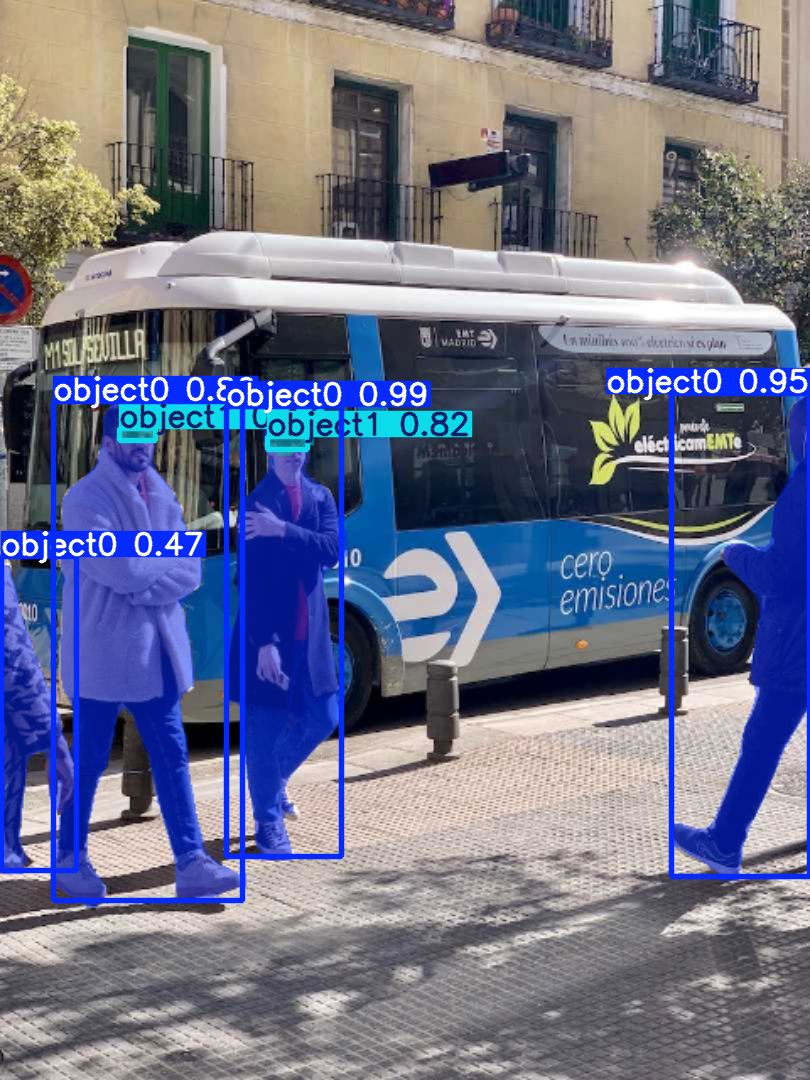


image 1/1 /content/bus.jpg: 640x640 4 object0s, 2 object1s, 149.2ms
Speed: 6.2ms preprocess, 149.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/zidane.jpg: 640x640 2 object0s, 49.1ms
Speed: 2.4ms preprocess, 49.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


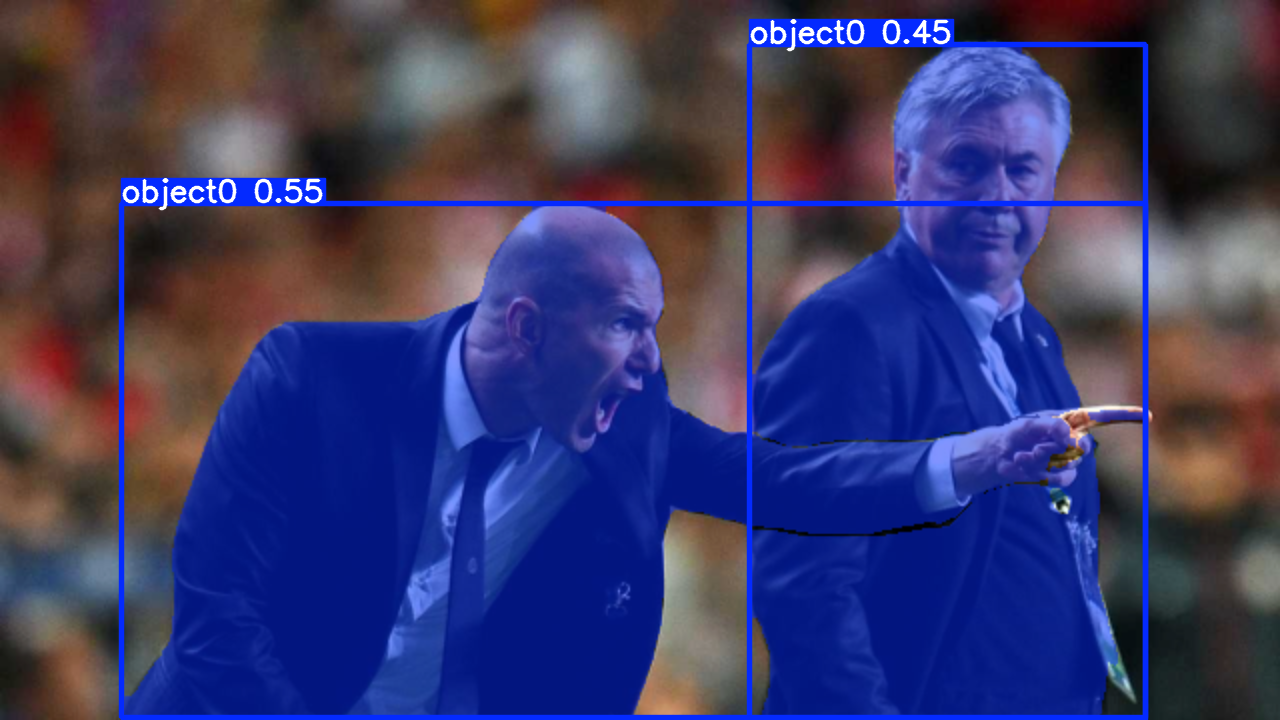

In [ ]:
# Visual Prompt with boxes
from ultralytics import YOLOE
import numpy as np
from ultralytics.models.yolo.yoloe.predict_vp import YOLOEVPSegPredictor
from PIL import Image, ImageDraw
from IPython.display import display

model = YOLOE("yoloe-v8l-seg.pt").cuda()

# Multiple boxes can also be passed as visual prompt in an image, which leads to more accurate prompt
visuals = dict(
    bboxes=np.array(
        [
            [221.52, 405.8, 344.98, 857.54], # For person
            [120, 425, 160, 445], # For glasses
        ],

    ),
    cls=np.array(
        [
            0, # For person
            1, # For glasses
        ]
    )
)

source_image = 'bus.jpg'

# Show boxes
image = Image.open(source_image)
draw = ImageDraw.Draw(image)
draw.rectangle([(221.52, 405.8), (344.98, 857.54)], width=5)
draw.rectangle([(120, 425), (160, 445)], width=5, outline='red')
display(image)


results = model.predict(source_image, prompts=visuals, predictor=YOLOEVPSegPredictor)
results[0].show()

# Prompts in different images can be passed
# Please set a smaller conf for cross-image prompts
# model.predictor = None  # remove VPPredictor
target_image = 'zidane.jpg'
model.predict(source_image, prompts=visuals, predictor=YOLOEVPSegPredictor, return_vpe=True)
model.set_classes(["object0", "object1"], model.predictor.vpe)
model.predictor = None  # remove VPPredictor
results = model.predict(target_image)
results[0].show()

In [ ]:
# Visual Prompt with handcrafted shapes
from ultralytics import YOLOE
import numpy as np
from ultralytics.models.yolo.yoloe.predict_vp import YOLOEVPSegPredictor
from PIL import Image, ImageDraw
from IPython.display import display

model = YOLOE("yoloe-v8l-seg.pt").cuda()

# Multiple handcrafted shapes can also be passed as visual prompt in an image, which leads to more accurate prompt
mask_img = Image.open('bus_mask.png')
mask = np.array(mask_img.convert('L'))
mask[mask > 0] = 1
visuals = dict(
    masks=mask[None],
    cls=np.array([0])
)

source_image = 'bus.jpg'

# Show handcrafted shapes
image = Image.open(source_image).convert('RGBA')
image = Image.alpha_composite(image, mask_img)
display(image)


results = model.predict(source_image, prompts=visuals, predictor=YOLOEVPSegPredictor)
results[0].show()

# Prompts in different images can be passed
# Please set a smaller conf for cross-image prompts
# model.predictor = None  # remove VPPredictor
target_image = 'zidane.jpg'
model.predict(source_image, prompts=visuals, predictor=YOLOEVPSegPredictor, return_vpe=True)
model.set_classes(["object0"], model.predictor.vpe)
model.predictor = None  # remove VPPredictor
results = model.predict(target_image, conf=0.1)
results[0].show()

Transferred 688/688 items from pretrained weights
Build text model mobileclip:blt
YOLOe-v8l summary (fused): 311 layers, 52,701,659 parameters, 49,166,608 gradients, 184.5 GFLOPs

image 1/1 /content/bus.jpg: 640x640 1 bus, 1 courtyard, 1 cowboy boot, 2 footwears, 1 glasses, 4 persons, 1 hydrant, 1 pedestrian street, 1 pump, 2 shoes, 1 stop sign, 2 ties, 55.1ms
Speed: 2.9ms preprocess, 55.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


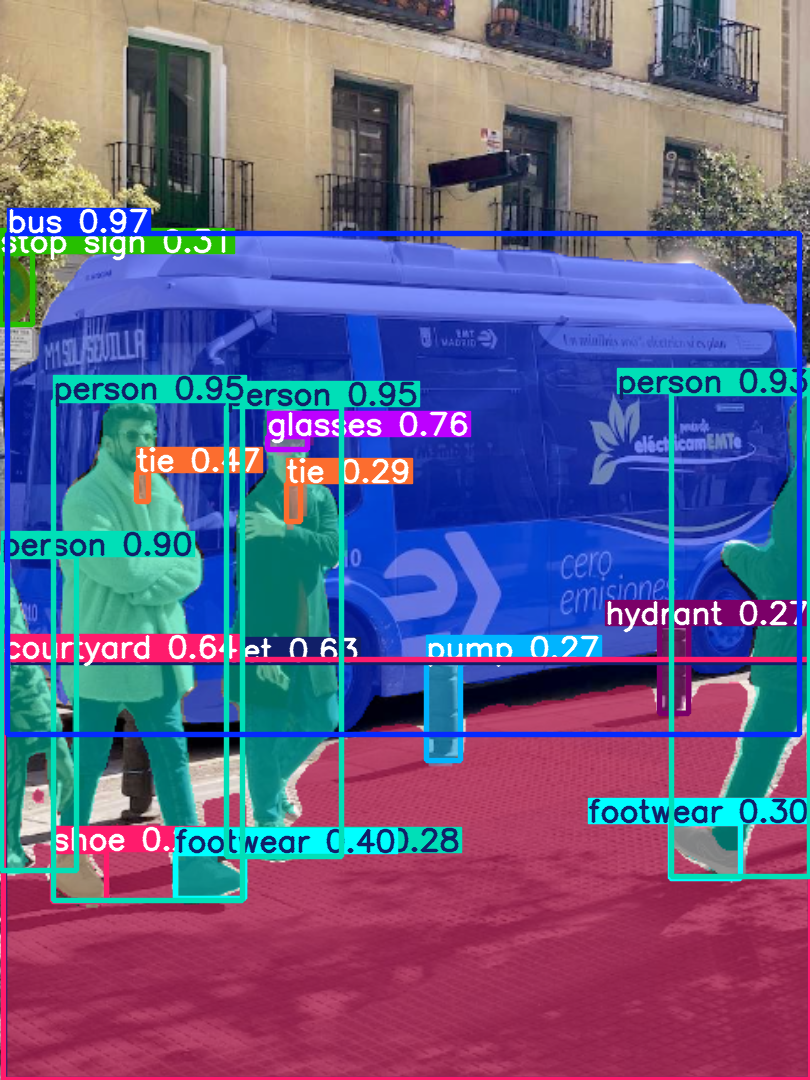

In [ ]:
# Prompt free

from ultralytics import YOLOE
from ultralytics.models.yolo.yoloe.val_pe_free import YOLOEPEFreeDetectValidator

unfused_model = YOLOE("yoloe-v8l.yaml").cuda()
unfused_model.load("yoloe-v8l-seg.pt")
unfused_model.eval()

with open('ram_tag_list.txt', 'r') as f:
    names = [x.strip() for x in f.readlines()]
vocab = unfused_model.get_vocab(names)

model = YOLOE("yoloe-v8l-seg-pf.pt").cuda()
model.set_vocab(vocab, names=names)
model.model.model[-1].is_fused = True
model.model.model[-1].conf = 0.001
model.model.model[-1].max_det = 1000

results = model.predict('bus.jpg')
results[0].show()